In [1]:
import pandas as pd
import numpy as np
import sys
import multiprocessing
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch

# extra imports
from collections import OrderedDict
from itertools import zip_longest
import datetime as dt
from datetime import timedelta

import glob
import fathon
from fathon import fathonUtils as fu


import matplotlib as mpl
from multiprocessing import Pool, freeze_support, Manager

import itertools
colormap = plt.cm.RdBu
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle.mplstyle'))
from collections import defaultdict
# import freqopttest.kernel as kernel

/home/ak/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# laptop data folder
laptopDataFolder = os.path.join('/media/ak/OS', 'Data')
expFiles = os.path.join(laptopDataFolder,'August11th2022Experiments')
filesTY1 = os.path.join(laptopDataFolder, 'TY1')
filesUS1 = os.path.join(laptopDataFolder, 'US1')
destination = os.path.join(laptopDataFolder, 'AthensSoloTripFeb2023')
figuresDestination = '/home/ak/Documents/Papers/StylisedFactsPaper/figures/'
#n: Array of window's sizes used for the computation.
n =[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

In [4]:

tickUS1 = sorted([f for f in os.listdir(filesUS1) if str('tick') in f])
tickTY1 = sorted([f for f in os.listdir(filesTY1) if str('tick') in f])
print(len(tickTY1))
symbol = 'TY1'

FileNotFoundError: [Errno 2] No such file or directory: '/media/ak/OS/Data/US1'

In [4]:
idx = 1
fileloc = os.path.join(filesTY1, tickTY1[idx])
idxtick= pd.read_pickle(fileloc)

In [5]:
micro_variables = ['arrival_rates', 'gk_vol', 'median_traded_volume', 'micro_price_change'] # all the micro variables

gk_vol_dict = defaultdict(dict) # vol dictionary

#mfdfa details for the data above
arrival_rates_dict = defaultdict(dict)

median_traded_volume_dict = defaultdict(dict)
micro_price_change_dict = defaultdict(dict)

mfdfa_dict = defaultdict(dict)

tau_dict = defaultdict(dict)

alpha_dict = defaultdict(dict)

mfSpect_dict = defaultdict(dict)

list_H_intercept_dict = defaultdict(dict)

list_H_dict = defaultdict(dict)

n_F_dict = defaultdict(dict)


for idx in range(0, len(filesTY1)):
    
    barIdxMfdfaFileLoc = os.path.join(filesTY1, tickTY1[idx]) # location of file for symbol/bar combination
    pkl_dict = pd.read_pickle(barIdxMfdfaFileLoc) # read the pickle file
    pkl_dict_keys = sorted(list(pkl_dict.keys())) # get out all the keys- but its really bars
    
    bar = list(set(pkl_dict_keys).difference(set(micro_variables)))[0] # get out the bar-choice
     
    gk_vol_dict[idx][bar] = pkl_dict['gk_vol'] # get the vol
    median_traded_volume_dict[idx][bar] = pkl_dict['median_traded_volume'] #get the volume
    arrival_rates_dict[idx][bar] = pkl_dict['arrival_rates'] #get arrival rates
    micro_price_change_dict[idx][bar] = pkl_dict['micro_price_change'] # get micro price change
    #---- start getting all the mfdfa variables ----#
    tau_dict[idx][bar] = pkl_dict[str(bar)]['tau'] # tau
    alpha_dict[idx][bar] = pkl_dict[str(bar)]['alpha'] # alpha
    mfSpect_dict[idx][bar] = pkl_dict[str(bar)]['mfSpect'] # mfSpect
    n_F_dict[idx][bar] = pkl_dict[str(bar)]['n_F'] # n_F
    list_H_dict[idx][bar] = pkl_dict[str(bar)]['list_H'] # list_H
    list_H_intercept_dict[idx][bar] = pkl_dict[str(bar)]['list_H_intercept'] # intercept
    n_F_dict[idx][bar] = pkl_dict[str(bar)]['n_F'] #n,F
    
    
    
    
    
                       
    


In [6]:
d =micro_price_change_dict # just define a variable based on one dictionary
# get all second level keys of all first level keys together (set comprehension)
sorted(list({k2 for v in d.values() for k2 in v}))
tick_all_indices=[(k1,k2) for (k1, v) in d.items() for k2 in v if k2=='tick' ]

In [7]:

micro_price_change = dict()
mfSpect_bar_choice = dict()
alpha_bar_choice = dict()
gk_vol = dict()
n_F_bar_choice =dict()
tau_bar_choice = dict()
list_H_intercept_bar_choice = dict()
list_H_bar_choice = dict()
median_traded_volume_choice = dict()
arrival_rates_choice = dict()
bar= 'tick'
for f in tick_all_indices: #picking one index!    
    micro_price_change[f[0]] = d[f[0]]['tick']
    mfSpect_bar_choice[f[0]] = mfSpect_dict[f[0]][str(bar)] 
    alpha_bar_choice[0] = alpha_dict[f[0]][str(bar)] 
    n_F_bar = n_F_dict[f[0]][str(bar)]
    gk_vol[f[0]] = gk_vol_dict[f[0]][str(bar)]
    tau_bar_choice[f[0]] = tau_dict[f[0]][str(bar)]
    list_H_intercept_bar_choice[f[0]] = list_H_intercept_dict[f[0]][str(bar)]
    list_H_bar_choice[f[0]] = list_H_dict[f[0]][str(bar)]
    arrival_rates_choice[f[0]] = arrival_rates_dict[f[0]][str(bar)]
    median_traded_volume_choice[f[0]] =median_traded_volume_dict[f[0]][str(bar)]    

In [8]:
print(set(micro_price_change.keys()) == set(alpha_bar_choice.keys()))
print(set(micro_price_change.keys()) == set(list_H_bar_choice.keys()))

mpc_keys = list(micro_price_change.keys())

False
True


In [9]:
#inside tracker app

In [10]:
mpc_df =pd.DataFrame.from_dict(micro_price_change).fillna(0)
mpc_df.shape
std_df =pd.DataFrame()

In [11]:
std= mpc_df.std(axis=0)
std_df['std'] = std
first_regime = np.quantile(std, 0.33) # thresholds based on the definition of a median
second_regime = np.quantile(std, 0.66)

In [12]:
std_df.describe()

,std
count,21.000000
mean,0.000080
std,0.000030
min,0.000044
25%,0.000058
50%,0.000072
75%,0.000090
max,0.000150


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


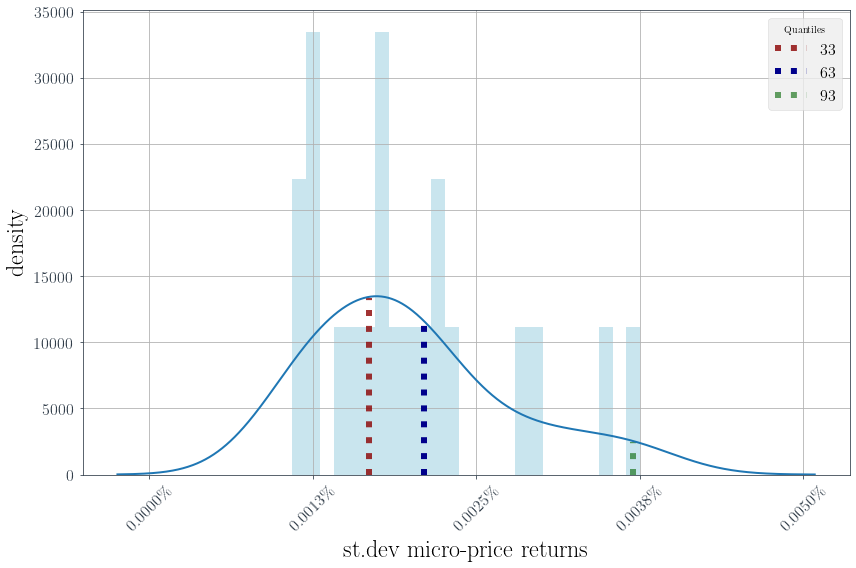

In [13]:
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize = (12,8))

# Plots #
    # Plot histogram
_=std.plot(kind = "hist", density = True, bins = 25, color='lightblue', alpha=0.65, label="") # change density to true, because KDE uses density
    # Plot KDE
# _=std.plot(kind = "kde", color='darkred')
    
# Calculate percentiles
quant_5, quant_33, quant_66, quant_99 = std.quantile(0.05), std.quantile(0.33), std.quantile(0.66), std.quantile(0.99)

# [quantile, opacity, length]
quants = [ [quant_33, 0.8, 0.38, 'darkred', '33%'], [quant_66, 1, 0.33, 'darkblue','63%'], [quant_99, 0.6, 0.07, 'darkgreen','93%']]
labels = ['33%', '66%', '99%']
#[quant_5, 0.6, 0.13],
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":",linewidth=6, color =i[3], label = i[4])

plt.style.use("bmh")
# Later in the code
ax.grid(False)
_=std.plot(kind = "kde",label="")

ax.tick_params(axis='x', labelrotation = 45)
# fmt = '%.000f%%' # Format you want the ticks, e.g. '40%'
# xticks = mtick.FormatStrFormatter(fmt)
# # ax.xaxis.set_major_formatter(mtick.PercentFormatter())
# ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

ax.xaxis.set_major_formatter(mtick.PercentFormatter(4.0))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
_=ax.set_ylabel('density', fontsize= 24)
_=ax.set_xlabel('st.dev micro-price returns', fontsize= 24)
_=plt.legend(title='Quantiles', fontsize=16)
file_name = str(symbol)+'_'+str(bar)+'_std_regimes.png'
plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")


In [14]:
#splitting into regimes!
std_df['LowRegime'] = std_df['std'].apply(lambda x: '1' if x <= first_regime else '0')
std_df['HiRegime'] = std_df['std'].apply(lambda x: '1' if x >= second_regime else '0')
std_df['MidRegime'] = std_df['std'].apply(lambda x: '1' if first_regime<x < second_regime else '0')




In [15]:
std_df
low_regime_indices = std_df.index[std_df['LowRegime'] == '1'].tolist()
hi_regime_indices = std_df.index[std_df['HiRegime'] == '1'].tolist()
mid_regime_indices = std_df.index[std_df['MidRegime'] == '1'].tolist()

# tau

In [16]:
tau_bar_choice_df =pd.DataFrame.from_dict(tau_bar_choice).fillna(0)

In [17]:
low_regime_tau = pd.DataFrame.from_dict({k:tau_bar_choice[k] for k in low_regime_indices})
hi_regime_tau = pd.DataFrame.from_dict({k:tau_bar_choice[k] for k in hi_regime_indices})
mid_regime_tau = pd.DataFrame.from_dict({k:tau_bar_choice[k] for k in mid_regime_indices})



In [18]:
lbar=low_regime_tau.median(axis=0).mean()
mbar = mid_regime_tau.median(axis=0).mean()
hbar =hi_regime_tau.median(axis=0).mean()

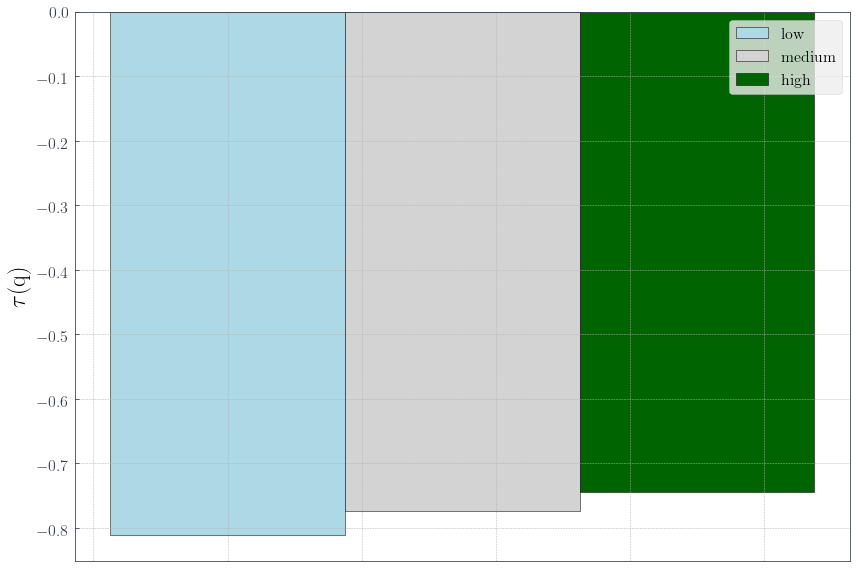

In [19]:
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))
n=1
r = np.arange(n)
width = 0.035

ax.bar(r, lbar, color = 'lightblue',
        width = width, edgecolor = 'black',
        label='low')
ax.bar(r + width, mbar, color = 'lightgrey',
        width = width, edgecolor = 'black',
        label='medium')
ax.bar(r + 2*width, hbar, color = 'darkgreen',
        width = width, edgecolor = 'black',
        label='high')

plt.ylabel('$\\tau$(q)', fontsize=24)
ax.set_facecolor('xkcd:white')
plt.xticks(fontsize=16)
ax.tick_params(labelbottom = False,bottom = False)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)
file_name = str(symbol)+'_'+str(bar)+'_tau_barplots.png'
plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")
plt.show()

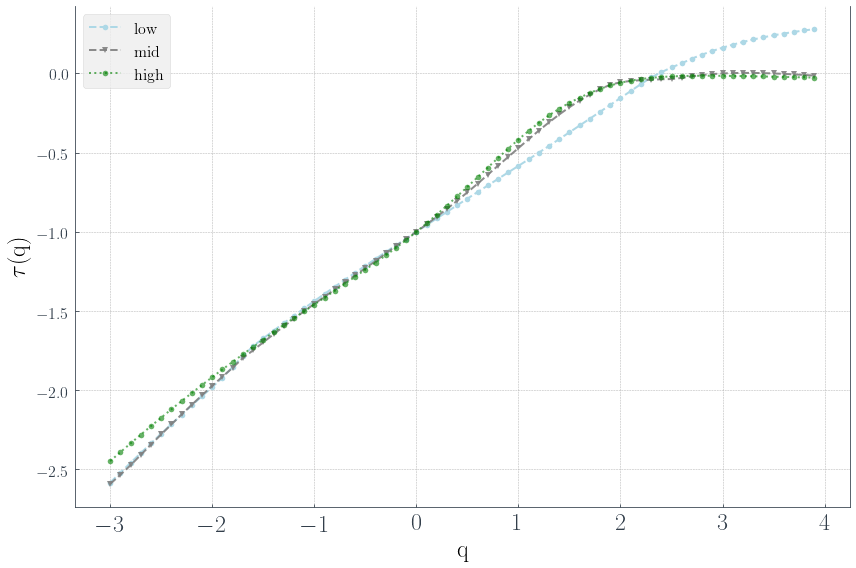

In [20]:
qs = np.arange(-3, 4, 0.1)
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))
ax.spines['top'].set_visible(False)
ax.set_facecolor('xkcd:white')
plt.plot(qs, low_regime_tau.median(axis=1),color='lightblue', marker='o', linestyle='dashed', label ='low')
plt.plot(qs, mid_regime_tau.median(axis=1),color='grey', marker='v', linestyle='dashed',alpha=0.9, label = 'mid')
plt.plot(qs, hi_regime_tau.median(axis=1), 'go:',alpha =0.6, label='high')
plt.xlabel('q', fontsize=24)
plt.ylabel('$\\tau$(q)', fontsize=24)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)
# plt.title('$\\tau$(q)', fontsize=14)
# plt.legend(title='Regimes', fontsize = 12)
file_name = str(symbol)+'_'+str(bar)+'_tauq_regimes.png'
plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")

In [21]:
## arrival rates
low_regime_arrivals = pd.DataFrame.from_dict({k:arrival_rates_choice[k] for k in low_regime_indices})
hi_regime_arrivals = pd.DataFrame.from_dict({k:arrival_rates_choice[k] for k in hi_regime_indices})
mid_regime_arrivals = pd.DataFrame.from_dict({k:arrival_rates_choice[k] for k in mid_regime_indices})



In [22]:
lbar_arrivals=low_regime_arrivals.median(axis=1).mean()
mbar_arrivals = mid_regime_arrivals.median(axis=1).mean()
hbar_arrivals =hi_regime_arrivals.median(axis=1).mean()

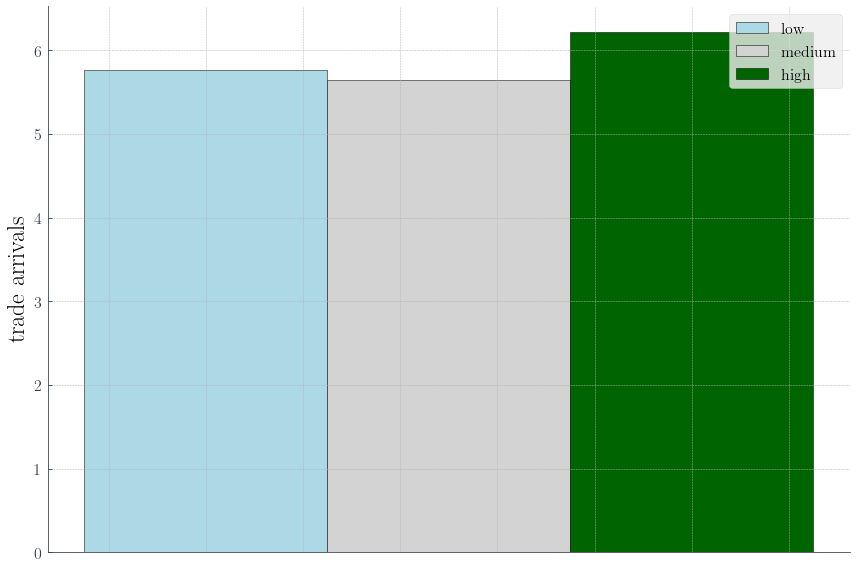

In [23]:
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))

ax.set_facecolor('xkcd:white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
n=1
r = np.arange(n)
width = 0.025

plt.bar(r, lbar_arrivals, color = 'lightblue',
        width = width, edgecolor = 'black',
        label='low')
plt.bar(r + width, mbar_arrivals, color = 'lightgrey',
        width = width, edgecolor = 'black',
        label='medium')
plt.bar(r + 2*width, hbar_arrivals, color = 'darkgreen',
        width = width, edgecolor = 'black',
        label='high')
plt.ylabel('trade arrivals', fontsize=24)
ax.tick_params(labelbottom = False,bottom = False)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)
plt.xticks(fontsize=16)
file_name = str(symbol)+'_'+str(bar)+'_trade_arrivals_regimes.png'
plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")
plt.show()

## volume

In [24]:
low_regime_median_traded_volume = pd.DataFrame.from_dict({k:median_traded_volume_choice[k] for k in low_regime_indices})
hi_regime_median_traded_volume = pd.DataFrame.from_dict({k:median_traded_volume_choice[k] for k in hi_regime_indices})
mid_regime_median_traded_volume = pd.DataFrame.from_dict({k:median_traded_volume_choice[k] for k in mid_regime_indices})



In [25]:
low_regime_median_traded_volume.median(axis=1).mean()
hi_regime_median_traded_volume.median(axis=1).mean()
mid_regime_median_traded_volume.median(axis=1).mean()


13.582634125428712

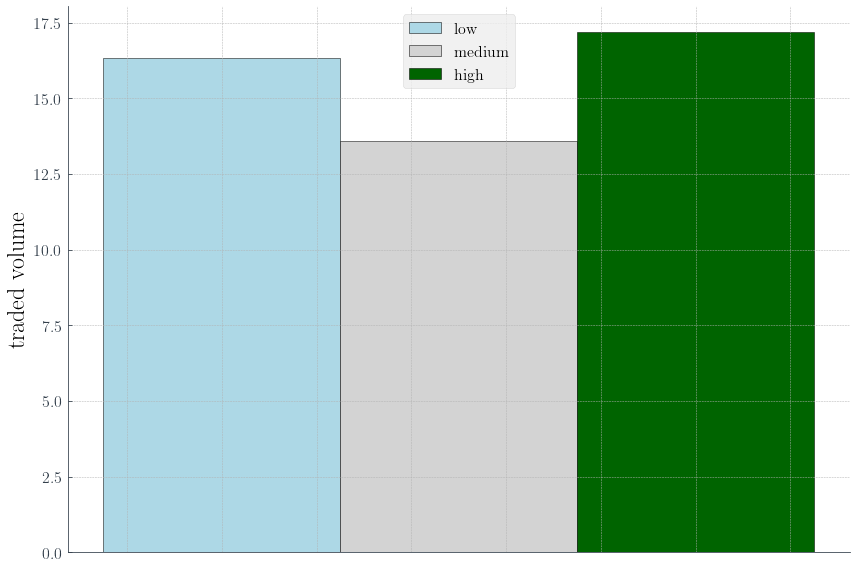

In [26]:
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))

ax.set_facecolor('xkcd:white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

n=1
r = np.arange(n)
width = 0.025

plt.bar(r, low_regime_median_traded_volume.median(axis=1).mean(), color = 'lightblue',
        width = width, edgecolor = 'black',
        label='low')
plt.bar(r + width, mid_regime_median_traded_volume.median(axis=1).mean(), color = 'lightgray',
        width = width, edgecolor = 'black',
        label='medium')
plt.bar(r + 2*width, hi_regime_median_traded_volume.median(axis=1).mean(), color = 'darkgreen',
        width = width, edgecolor = 'black',
        label='high')

plt.ylabel('traded volume', fontsize= 24)
ax.tick_params(labelbottom = False,bottom = False)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)
plt.xticks(fontsize=16)
file_name = str(symbol)+'_'+str(bar)+'_traded_volumes_regimes.png'
plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")

plt.show()

In [27]:
## lets do some DCCA


In [28]:
a= low_regime_median_traded_volume.median(axis=1)
b = low_regime_arrivals.median(axis=1)
a = fu.toAggregated(a)
b = fu.toAggregated(b)

In [29]:
winSizes = fu.linRangeByStep(20, 1000, step=50)
polOrd = 1

In [30]:
pydcca = fathon.DCCA(a, b)
n, F = pydcca.computeFlucVec(winSizes, polOrd=polOrd)

In [31]:
H, H_intercept = pydcca.fitFlucVec()

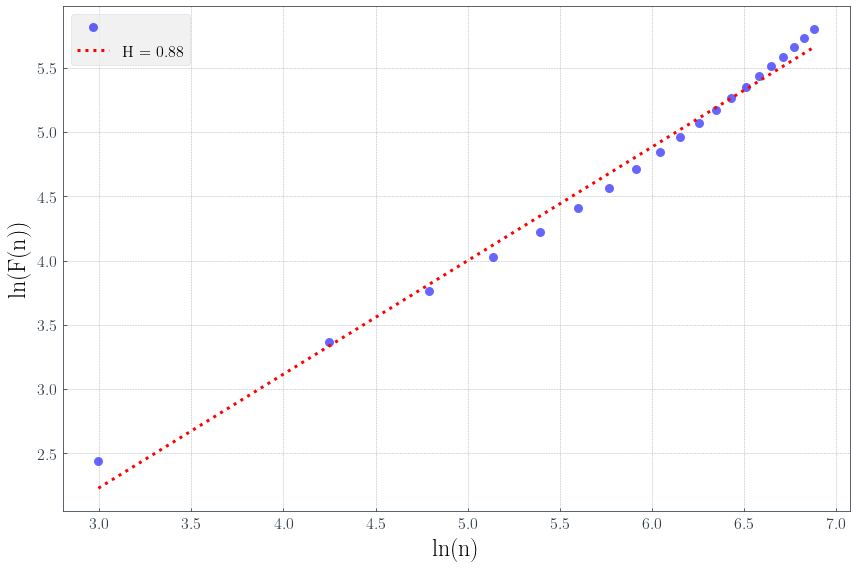

In [32]:
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))

ax.set_facecolor('xkcd:white')
plt.plot(np.log(n), np.log(F), 'bo',alpha=0.6,markersize=9, label =" ")
plt.plot(np.log(n), H_intercept+H*np.log(n), 'k:',color='r', linewidth=3 ,label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=24)
plt.ylabel('ln(F(n))', fontsize=24)
plt.yticks(fontsize=16)

plt.xticks(fontsize=16)

plt.legend(loc=0, fontsize=16)

file_name = str(symbol)+'_'+str(bar)+'_lnFn_n.png'
_=plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")

_=plt.show()

In [33]:
limits_list = np.array([[20,120], [220,870]], dtype=int)
list_H, list_H_intercept = pydcca.multiFitFlucVec(limits_list)

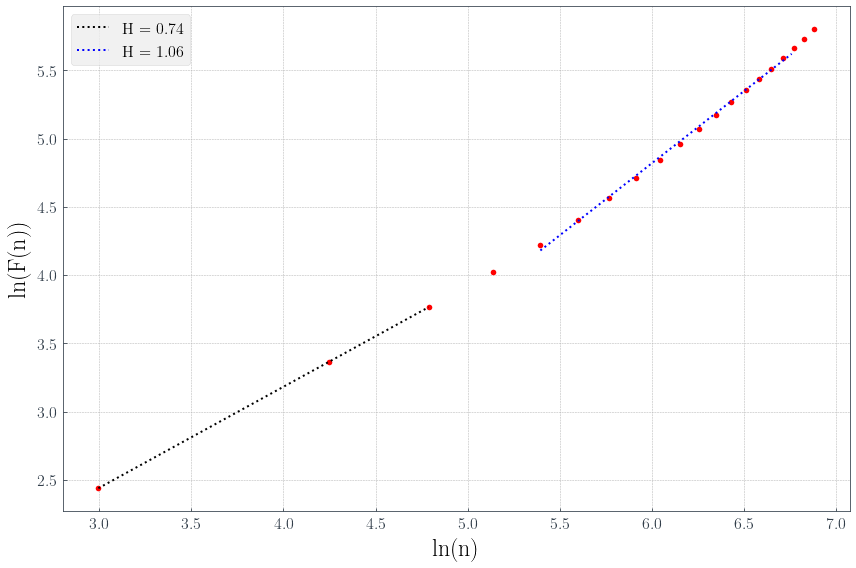

In [34]:
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))
clrs = ['k', 'b', 'm', 'c', 'y']
stls = [':', '.', '.-']
plt.plot(np.log(n), np.log(F),'ro')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1, 20)
    plt.plot(np.log(n_rng), list_H_intercept[i]+list_H[i]*np.log(n_rng),             
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('ln(n)', fontsize=24)
plt.ylabel('ln(F(n))', fontsize=24)
plt.yticks(fontsize=16)
ax.set_facecolor('xkcd:white')
plt.xticks(fontsize=16)

_=plt.legend(loc=0, fontsize=16)


file_name = str(symbol)+'_'+str(bar)+'_lnFn_n_split_plot.png'
_=plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")


In [35]:
%%time
n, rho = pydcca.computeRho(winSizes, polOrd=polOrd)

CPU times: user 1min 50s, sys: 33.2 ms, total: 1min 50s
Wall time: 6.94 s


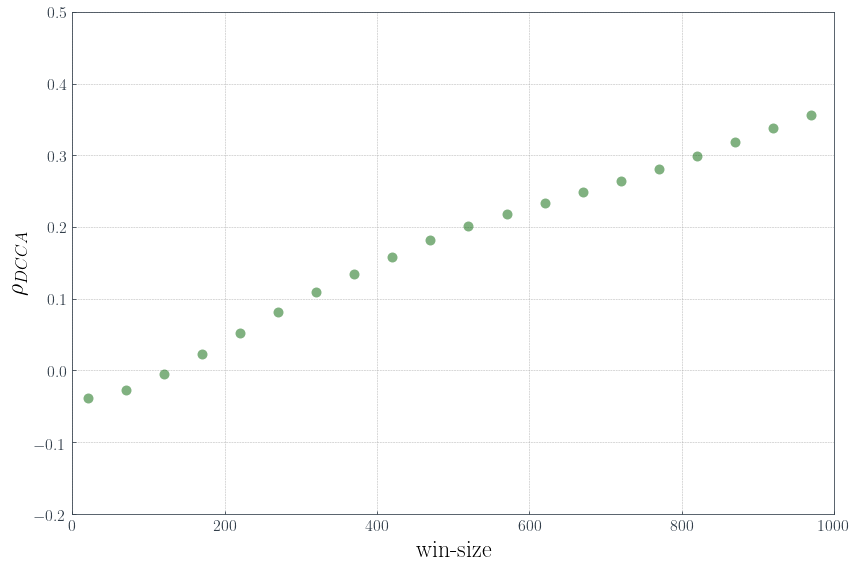

In [36]:
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(n, rho, 'ro', alpha =1.5, markersize = 10,color='darkgreen')
plt.ylim(-1, 1)
plt.xlabel('win-size', fontsize=24)
plt.ylabel('$\\rho_{DCCA}$', fontsize=24)
plt.yticks(fontsize=16)
ax.set_facecolor('xkcd:white')
plt.xticks(fontsize=16)

_=plt.xlim(0, 1000)
_=plt.ylim(-0.2, 0.5)

file_name = str(symbol)+'_'+str(bar)+'_rho_DCCA.png'
_=plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")

In [37]:
pythresh = fathon.DCCA()

In [38]:
L = 300
winSizes = fu.linRangeByStep(4, 200, step=1)
nSim = 180
confLvl = 0.95
polOrd = 1

In [39]:
%%time
n, cInt1, cInt2 = pythresh.rhoThresholds(L, winSizes, nSim, confLvl, polOrd=polOrd, verbose=False)

CPU times: user 12min 16s, sys: 148 ms, total: 12min 16s
Wall time: 46.2 s


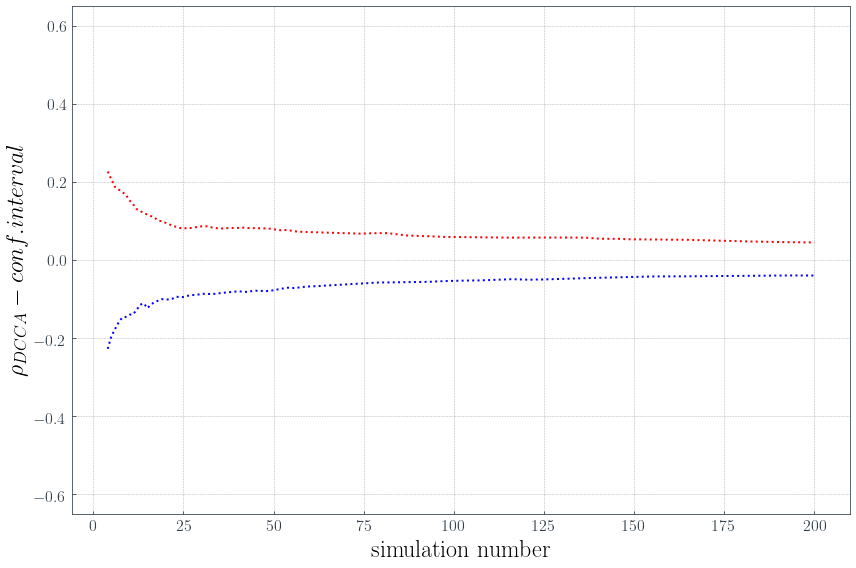

In [43]:
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(n, cInt1, 'r:', markersize= 15)
plt.yticks(fontsize=16)
ax.set_facecolor('xkcd:white')
plt.xticks(fontsize=16)
plt.plot(n, cInt2, 'b:')

_=plt.ylabel('$\\rho_{DCCA}- '+'  '+ 'conf.interval$', fontsize=24)
_=plt.ylim(-0.65, 0.65)

_=plt.xlabel('simulation number', fontsize=24)

file_name = str(symbol)+'_'+str(bar)+'_rho_confi_intervals_simulation.png'
_=plt.savefig(os.path.join(figuresDestination,file_name),dpi=300, bbox_inches="tight")